In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from utilsforecast.plotting import plot_series
from mlforecast import MLForecast
from sklearn.linear_model import LinearRegression
# feature engine
from mlforecast.target_transforms import Differences

# data

In [11]:
df = pd.read_csv(
    "https://datasets-nixtla.s3.amazonaws.com/air-passengers.csv", 
    parse_dates=["ds"]
)

# data check
print(df.head(15))
print()
print(df.shape)
print()
print(df["unique_id"].value_counts())

        unique_id         ds    y
0   AirPassengers 1949-01-01  112
1   AirPassengers 1949-02-01  118
2   AirPassengers 1949-03-01  132
3   AirPassengers 1949-04-01  129
4   AirPassengers 1949-05-01  121
5   AirPassengers 1949-06-01  135
6   AirPassengers 1949-07-01  148
7   AirPassengers 1949-08-01  148
8   AirPassengers 1949-09-01  136
9   AirPassengers 1949-10-01  119
10  AirPassengers 1949-11-01  104
11  AirPassengers 1949-12-01  118
12  AirPassengers 1950-01-01  115
13  AirPassengers 1950-02-01  126
14  AirPassengers 1950-03-01  141

(144, 3)

unique_id
AirPassengers    144
Name: count, dtype: int64


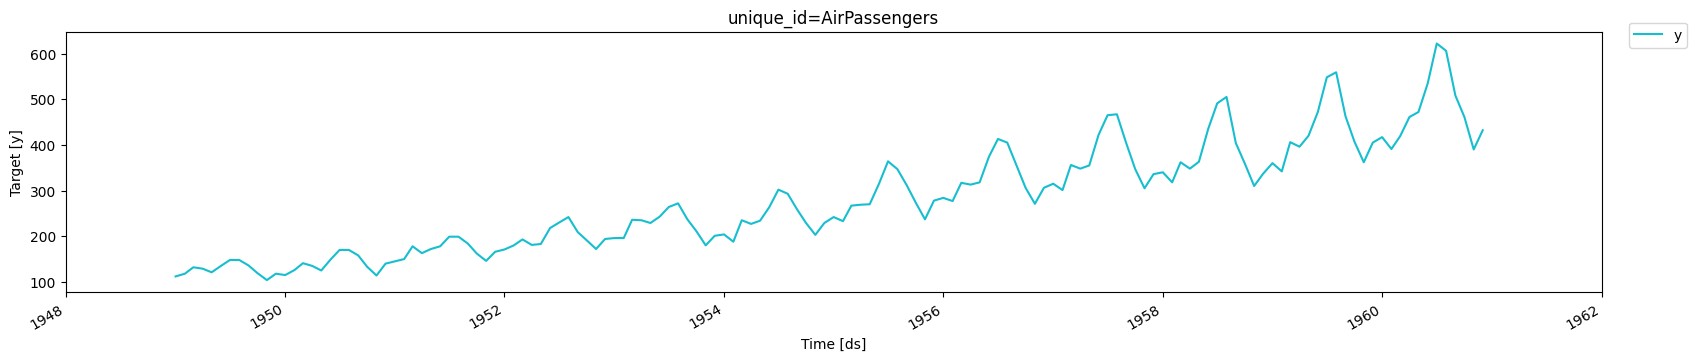

In [4]:
# data visual
fig = plot_series(df)
fig

# Forecasting

## model

In [21]:
# model
fcst = MLForecast(
    models = LinearRegression(),
    freq = "MS",  # series has a monthly frequency
    lags = [12],
    target_transforms = [Differences([12])],  # remove trend
)

## feature engine

In [20]:
fcst = MLForecast(
    models = [],
    freq = "MS",
    lags = [12],
    target_transforms=[Differences([12])],
)
prep_data = fcst.preprocess(df)
with pd.option_context("display.max_columns", None):
    print(prep_data.head(20))
    print()
    print(prep_data.shape)
    print()
    print(prep_data["unique_id"].value_counts())

        unique_id         ds     y  lag12
24  AirPassengers 1951-01-01  30.0    3.0
25  AirPassengers 1951-02-01  24.0    8.0
26  AirPassengers 1951-03-01  37.0    9.0
27  AirPassengers 1951-04-01  28.0    6.0
28  AirPassengers 1951-05-01  47.0    4.0
29  AirPassengers 1951-06-01  29.0   14.0
30  AirPassengers 1951-07-01  29.0   22.0
31  AirPassengers 1951-08-01  29.0   22.0
32  AirPassengers 1951-09-01  26.0   22.0
33  AirPassengers 1951-10-01  29.0   14.0
34  AirPassengers 1951-11-01  32.0   10.0
35  AirPassengers 1951-12-01  26.0   22.0
36  AirPassengers 1952-01-01  26.0   30.0
37  AirPassengers 1952-02-01  30.0   24.0
38  AirPassengers 1952-03-01  15.0   37.0
39  AirPassengers 1952-04-01  18.0   28.0
40  AirPassengers 1952-05-01  11.0   47.0
41  AirPassengers 1952-06-01  40.0   29.0
42  AirPassengers 1952-07-01  31.0   29.0
43  AirPassengers 1952-08-01  43.0   29.0

(120, 4)

unique_id
AirPassengers    120
Name: count, dtype: int64


## training

In [22]:
# model train
fcst.fit(df)

MLForecast(models=[LinearRegression], freq=MS, lag_features=['lag12'], date_features=[], num_threads=1)

## predict

In [23]:
# model predict
preds = fcst.predict(h = 12)
print(preds)

        unique_id         ds  LinearRegression
0   AirPassengers 1961-01-01        449.527039
1   AirPassengers 1961-02-01        423.861847
2   AirPassengers 1961-03-01        453.368408
3   AirPassengers 1961-04-01        493.192261
4   AirPassengers 1961-05-01        504.736298
5   AirPassengers 1961-06-01        567.275940
6   AirPassengers 1961-07-01        653.815613
7   AirPassengers 1961-08-01        638.945557
8   AirPassengers 1961-09-01        541.029236
9   AirPassengers 1961-10-01        493.652588
10  AirPassengers 1961-11-01        423.740662
11  AirPassengers 1961-12-01        465.782532


## predictions

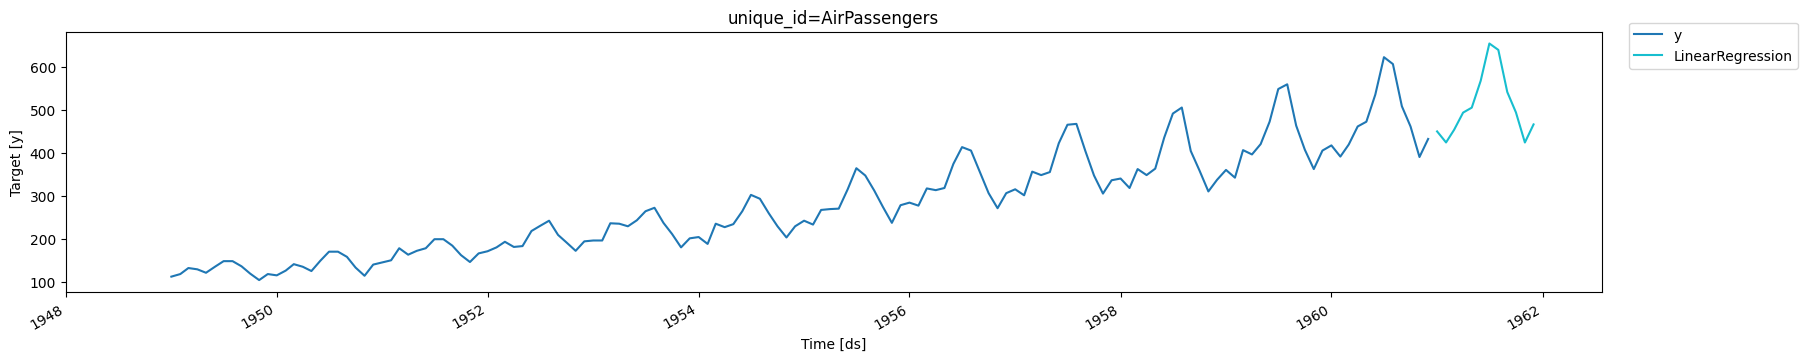

In [24]:
# result visual
fig = plot_series(df, preds)
fig